# Seminar 2. Networks of spiking neurons
* Synapses in Brian2 simulator 
* Models of synaptic transmission
* Visualizing neural population
* Adding noise
* Synchronization
* Connectivity patterns: full, random, layered, recurrent
* Network inputs and outputs
https://brian2.readthedocs.io/en/stable/resources/tutorials/2-intro-to-brian-synapses.html

### Synapses in Brian2

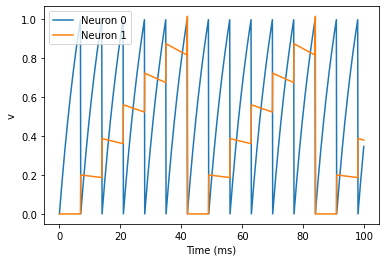

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import ms,mvolt

b2.start_scope() # clear the Brian scope

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = b2.NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0]
G.tau = [10, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = b2.Synapses(G, G, on_pre='v_post += 0.2')
S.connect(i=0, j=1)

#S_inh = b2.Synapses(G, G, on_pre='v_post -= 0.3')
#S_inh.connect(i=1, j=0)

M = b2.StateMonitor(G, 'v', record=True)

b2.run(100*ms)

plt.plot(M.t/ms, M.v[0], label='Neuron 0')
plt.plot(M.t/ms, M.v[1], label='Neuron 1')
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.legend();

### Synaptic weights

WARNING    C:\Users\nbazs\Anaconda3\envs\sirius\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
 [py.warnings]
WARNING    C:\Users\nbazs\Anaconda3\envs\sirius\lib\site-packages\networkx\drawing\nx_pylab.py:676: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if cb.iterable(node_size):  # many node sizes
 [py.warnings]


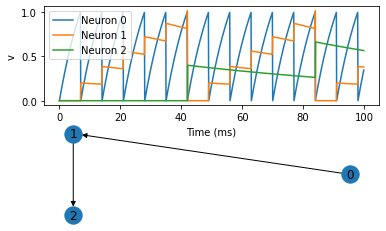

In [2]:
import numpy as np
import networkx as nx

b2.start_scope()

eqs = '''
dv/dt = (I-v)/tau : 1
I : 1
tau : second
'''
G = b2.NeuronGroup(3, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = [2, 0, 0]
G.tau = [10, 100, 100]*ms

# Comment these two lines out to see what happens without Synapses
S = b2.Synapses(G, G, 'w : 1', on_pre='v_post += w')

S.connect(i=[0,1], j=[1, 2])#create 0->1 and 1->2 connections
#S.w = '0.3' # constant
#S.w = 'j*0.2' # j is the target index
S.w = '(i+1)*0.2' # i is the source index

M = b2.StateMonitor(G, 'v', record=True)

b2.run(100*ms)

fig, (ax_V, ax_Net) = plt.subplots(2,1)
plt.subplot(ax_V)
plt.plot(M.t/ms, M.v[0], label='Neuron 0')
plt.plot(M.t/ms, M.v[1], label='Neuron 1')
plt.plot(M.t/ms, M.v[2], label='Neuron 2')
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.legend();

plt.subplot(ax_Net)
elist = [(0,1),(1,2)]
G = nx.DiGraph(elist)
nx.draw_circular(G, with_labels=True)

### Neural populations
Here we do:
* create a population of N=100 neurons
* create random connectivity
* visualize their activity

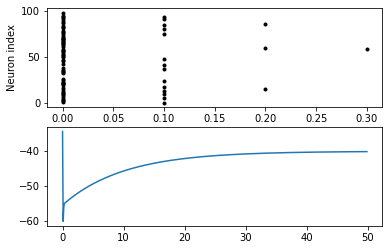

In [88]:
b2.start_scope()
num = 100
R = 10. * b2.Mohm # membrane resistance 
tau = 10*ms # membrane time scale
v_rest = -50 * mvolt # rest potential 
v0 = v_rest # initial potential
v_th = -35 * mvolt # threshold
v_reset = -60 * mvolt # reset potential
I = 1 * b2.namp
eqs ='''
     dv/dt=(v_rest-v)/tau + R*I/tau: volt
     '''
G = b2.NeuronGroup(num,eqs,
                   threshold='v>v_th', 
                   reset='v = v_reset', 
                   method='exact')
G.v='v_reset*rand()'

S = b2.Synapses(G, G, 'w : volt', on_pre='v_post += w')
S.connect(p=0.2)#create 0->1 and 1->2 connections
S.w = '0.95*mvolt' # constant
#S.w = 'j*0.2' # j is the target index
#S.w = '(i+1)*0.2' # i is the source index

v_mon = b2.StateMonitor(G, 'v', record=range(0,10))
spikemon = b2.SpikeMonitor(G)

T = 50 * ms
b2.run(T)

fig, (ax_spikes, ax_V) = plt.subplots(2,1)
plt.subplot(ax_spikes)
plt.plot(spikemon.t/ms, spikemon.i, '.k')
plt.xlabel('Time (ms)')
plt.ylabel('Neuron index');

plt.subplot(ax_V)
#plt.plot(spikemon.t/ms, v_mon.v[0][0:len(spikemon.t)]/mvolt)
plt.plot(v_mon.t/ms, v_mon.v[1]/mvolt)
#plt.plot(spikemon.t/ms, v_mon.v[2]/mvolt)


### Connectivity pattern
* layered
* small world
* recurrent

### Interacting populations
Brunel model

https://neuronaldynamics.epfl.ch/online/Ch13.S4.html

https://neuronaldynamics-exercises.readthedocs.io/en/latest/exercises/brunel-network.html
* Create three neuronal populations
* Create connections
* Observe and measure synchrony 
* Tune parameters to obtain synchrony pattern

In [ ]:
b2.start_scope()



<spikemonitor_1.count: array([4, 4])>
[10 10]


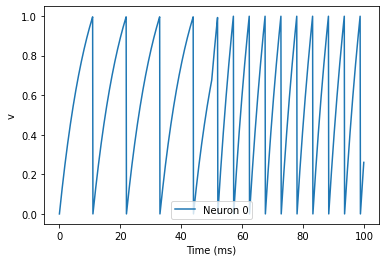

In [17]:
# Test vector input to neuron
%matplotlib inline
import matplotlib.pyplot as plt
import brian2 as b2
from brian2 import ms,mvolt
import numpy as np

b2.start_scope() # clear the Brian scope

eqs = '''
dv/dt = (I-v)/tau + inp/tau : 1
I : 1
tau : second
inp : 1
'''
w = np.array([0.5,-0.5])
obs = np.array([4,1])

G = b2.NeuronGroup(2, eqs, threshold='v>1', reset='v = 0', method='exact')
G.I = 0
G.tau = 10*ms
G.inp = w@obs

M = b2.StateMonitor(G, 'v', record=True)
SM = b2.SpikeMonitor(G)

b2.run(50*ms)
count_prev = np.array(SM.count)
print(SM.count)
obs[0] = 6
G.inp = w@obs
b2.run(50*ms)
new_count = SM.count - count_prev
print(new_count)

plt.plot(M.t/ms, M.v[0], label='Neuron 0')
plt.xlabel('Time (ms)')
plt.ylabel('v')
plt.legend();
#print(SM.count)